# **Diamond Price Prediction: Regression Algorithms**

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **EDA and  Feature Engineering**

**Load Dataet**

In [ ]:
dataset = pd.read_csv('diamonds.csv')
dataset

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Data Types of Attributes**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In this dataset we have some categorical and some numerical values. Any of the attributes don't have any null values.

**Basic Statistical Description of Datset**

In [ ]:
dataset.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Range of the values are different for each attribute and it's varying a lot. Therfore, feature scaling is necessary

**Value Counts of each Attribute**

In [ ]:
print("Unique values of each Attribute")
for feature in dataset.columns:
  print(feature," : ",len(dataset[feature].unique()))

Unique values of each Attribute
Unnamed: 0  :  53940
carat  :  273
cut  :  5
color  :  7
clarity  :  8
depth  :  184
table  :  127
price  :  11602
x  :  554
y  :  552
z  :  375


Here we can see that  there are some discrete values and some continuous values. Beside that, Unnamed 0 is nothing but the  serial no. of each row.

In [ ]:
dataset.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

As the  first attribute isn't helpful for prediction so I am dropping it from my dataset.

In [ ]:
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Categorize Features**

In [ ]:
numerical_features = [feature  for feature  in dataset.columns if dataset[feature].dtype!='O']
numerical_features

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features

['cut', 'color', 'clarity']

Features can be mainly classified in two groups: numerical features and categorical features.

In [ ]:
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) < 25]
discrete_features

[]

In [ ]:
continuous_features = numerical_features.copy() 
continuous_features

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Here, all the numerical_features, there is no discrete_features

 **Distribution of the Continuous Data**

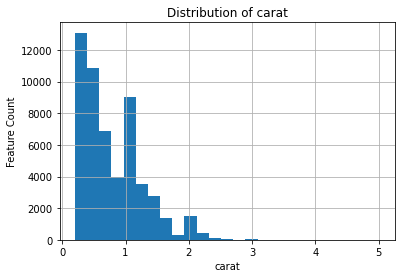

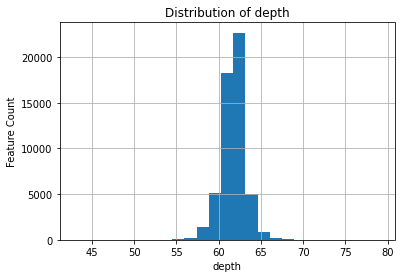

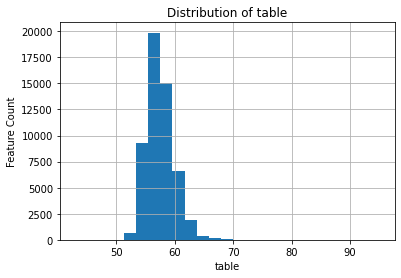

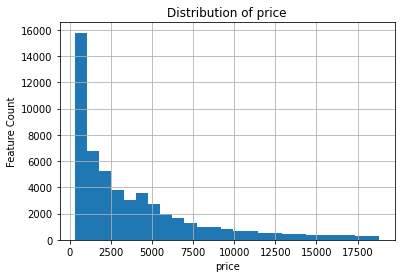

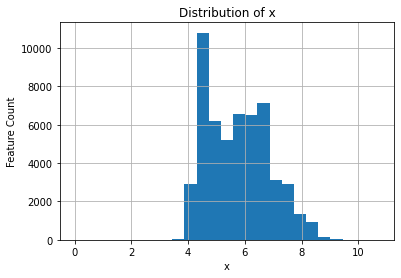

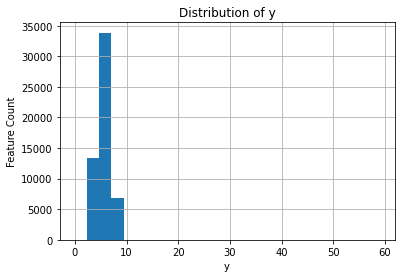

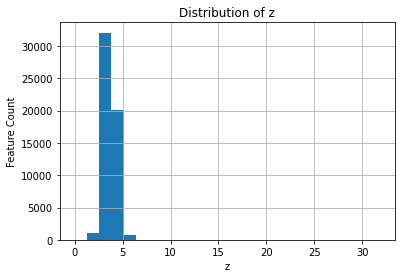

In [ ]:
for feature in continuous_features:
  dataset[feature].hist(bins=25)
  plt.xlabel(feature)
  plt.ylabel("Feature Count")
  temp = "Distribution of "+str(feature)
  plt.title(temp)
  plt.show()

We can see that all thes features has skewed distribution that means these are non-gaussian distribution. These need to be changed in normal distribution for better performance.

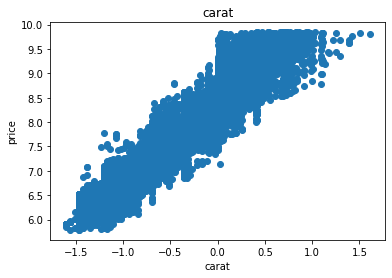

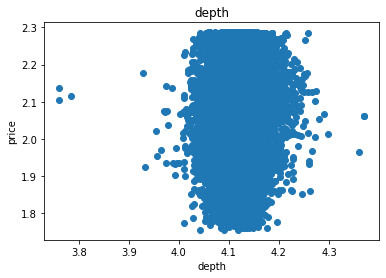

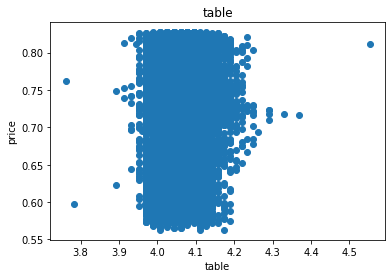

In [ ]:
data=dataset.copy()
for feature in continuous_features:
    if 0 in data[feature].unique() or feature=='price':
      data[feature] =  np.cbrt(data[feature])
      data['price'] = np.cbrt(data['price'])
    else:
        data[feature]=np.log(data[feature])
        data['price']=np.log(data['price'])
        plt.scatter(data[feature],data['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(feature)
        plt.show()

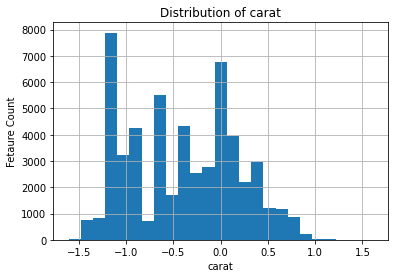

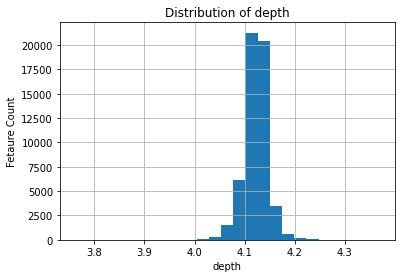

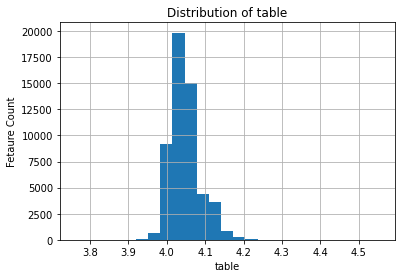

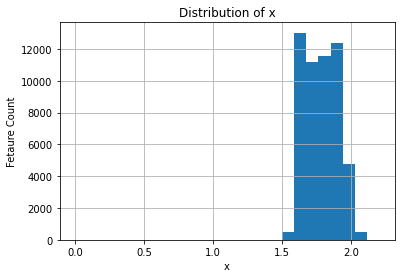

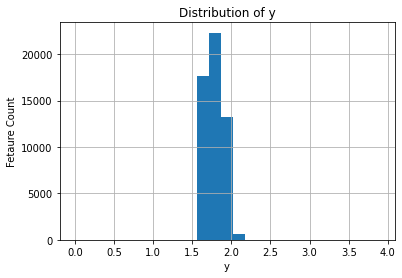

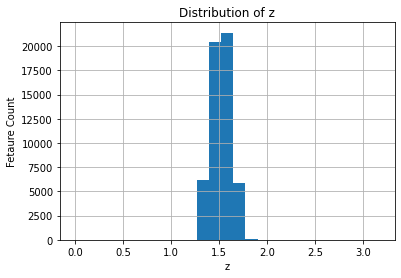

In [ ]:
for feature in continuous_features:
  if feature != 'price':
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Fetaure Count')
    temp = "Distribution of "+str(feature)
    plt.title(temp)
    plt.show()

In [ ]:
for feature in data.columns:
  if  feature not  in ['price']:
    dataset[feature] = data[feature]

In [ ]:
dataset.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.469676,Ideal,E,SI2,4.119037,4.007333,326,1.580759,1.584751,1.344421
1,-1.560648,Premium,E,SI1,4.091006,4.110874,326,1.572714,1.565947,1.321916
2,-1.469676,Good,E,VS1,4.041295,4.174387,327,1.593988,1.596607,1.321916
3,-1.237874,Premium,I,VS2,4.133565,4.060443,334,1.613429,1.617261,1.380337
4,-1.171183,Good,J,SI2,4.147885,4.060443,335,1.631160,1.632412,1.401020
5,-1.427116,Very Good,J,VVS2,4.139955,4.043051,336,1.579424,1.582092,1.353580
6,-1.427116,Very Good,I,VVS1,4.131961,4.043051,336,1.580759,1.584751,1.351758
7,-1.347074,Very Good,H,SI1,4.125520,4.007333,337,1.596607,1.601821,1.362616
8,-1.514128,Fair,E,VS2,4.175925,4.110874,337,1.570014,1.557748,1.355397
9,-1.469676,Very Good,H,VS1,4.084294,4.110874,338,1.587401,1.593988,1.337004


 **Outlier Detection**

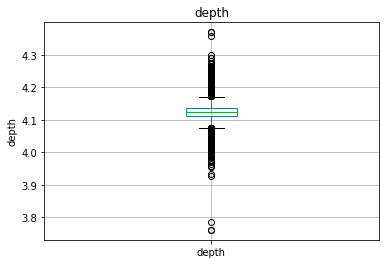

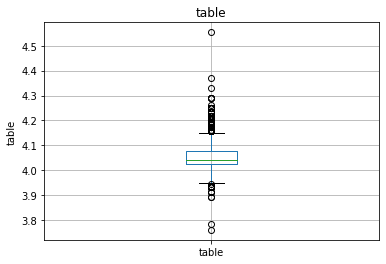

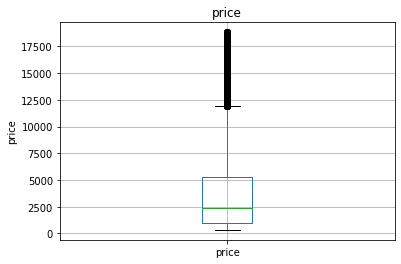

In [ ]:
for feature in continuous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

From the box plot it's clear that there are lot of outliers. We need to remove it.

**Encode Categorical Values**

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.4MB/s 


In [ ]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=categorical_features,handle_unknown='return_nan',return_df=True,use_cat_names=True)
dataset = encoder.fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
dataset.head()

,carat,cut_Ideal,cut_Premium,cut_Good,cut_Very Good,cut_Fair,color_E,color_I,color_J,color_H,color_F,color_G,color_D,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF,depth,table,price,x,y,z
0,-1.469676,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.119037,4.007333,326,1.580759,1.584751,1.344421
1,-1.560648,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.091006,4.110874,326,1.572714,1.565947,1.321916
2,-1.469676,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.041295,4.174387,327,1.593988,1.596607,1.321916
3,-1.237874,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.133565,4.060443,334,1.613429,1.617261,1.380337
4,-1.171183,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.147885,4.060443,335,1.631160,1.632412,1.401020


**Feature Scaling**

In [ ]:
scaled_features = [feature for feature in numerical_features if feature != 'price']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset[scaled_features] = sc.fit_transform(dataset[scaled_features])

In [ ]:
dataset.head(10)

,carat,cut_Ideal,cut_Premium,cut_Good,cut_Very Good,cut_Fair,color_E,color_I,color_J,color_H,color_F,color_G,color_D,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF,depth,table,price,x,y,z
0,-1.837668,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.162296,-1.118577,326,-1.712467,-1.690054,-1.678130
1,-1.993223,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.366781,1.577162,326,-1.780954,-1.850920,-1.896871
2,-1.837668,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-3.502782,3.230768,327,-1.599846,-1.588623,-1.896871
3,-1.441306,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.461962,0.264167,334,-1.434339,-1.411932,-1.329039
4,-1.327269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.077280,0.264167,335,-1.283385,-1.282317,-1.128014
5,-1.764895,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.736525,-0.188637,336,-1.723833,-1.712801,-1.589113
6,-1.764895,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.393046,-0.188637,336,-1.712467,-1.690054,-1.606820
7,-1.628028,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116272,-1.118577,337,-1.577545,-1.544022,-1.501284
8,-1.913677,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.282096,1.577162,337,-1.803940,-1.921061,-1.571453
9,-1.837668,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.655164,1.577162,338,-1.655921,-1.611033,-1.750227


**Extract Dependent and Independent Features**

In [ ]:
x = dataset.loc[:, ['carat', 'cut_Ideal', 'cut_Premium', 'cut_Good', 'cut_Very Good',
       'cut_Fair', 'color_E', 'color_I', 'color_J', 'color_H', 'color_F',
       'color_G', 'color_D', 'clarity_SI2', 'clarity_SI1', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS2', 'clarity_VVS1', 'clarity_I1',
       'clarity_IF', 'depth', 'table', 'x', 'y', 'z']].values
x

array([[-1.83766830e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.71246650e+00, -1.69005368e+00, -1.67812998e+00],
       [-1.99322292e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -1.78095404e+00, -1.85092003e+00, -1.89687106e+00],
       [-1.83766830e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.59984563e+00, -1.58862256e+00, -1.89687106e+00],
       ...,
       [ 6.54763605e-02,  0.00000000e+00,  0.00000000e+00, ...,
         1.85581516e-03,  1.64293303e-02,  9.57070125e-02],
       [ 4.17467265e-01,  0.00000000e+00,  1.00000000e+00, ...,
         4.27618549e-01,  4.00807859e-01,  3.41737699e-01],
       [ 1.83448772e-01,  1.00000000e+00,  0.00000000e+00, ...,
         1.52257534e-01,  1.84762593e-01,  2.06054222e-01]])

In [ ]:
y = dataset.loc[:, 'price'].values
y

array([ 326,  326,  327, ..., 2757, 2757, 2757])

**Split Dataset into Train and Test Set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

**Remove outliers**

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(x_train)
mask = yhat != -1
x_train, y_train = x_train[mask, :], y_train[mask]
print(x_train.shape, y_train.shape)

(41737, 26) (41737,)


**Feature Selection**

In [ ]:
!pip install autoviz

     |████████████████████████████████| 51kB 3.5MB/s 


**Visualization**

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (53940, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    11 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 21


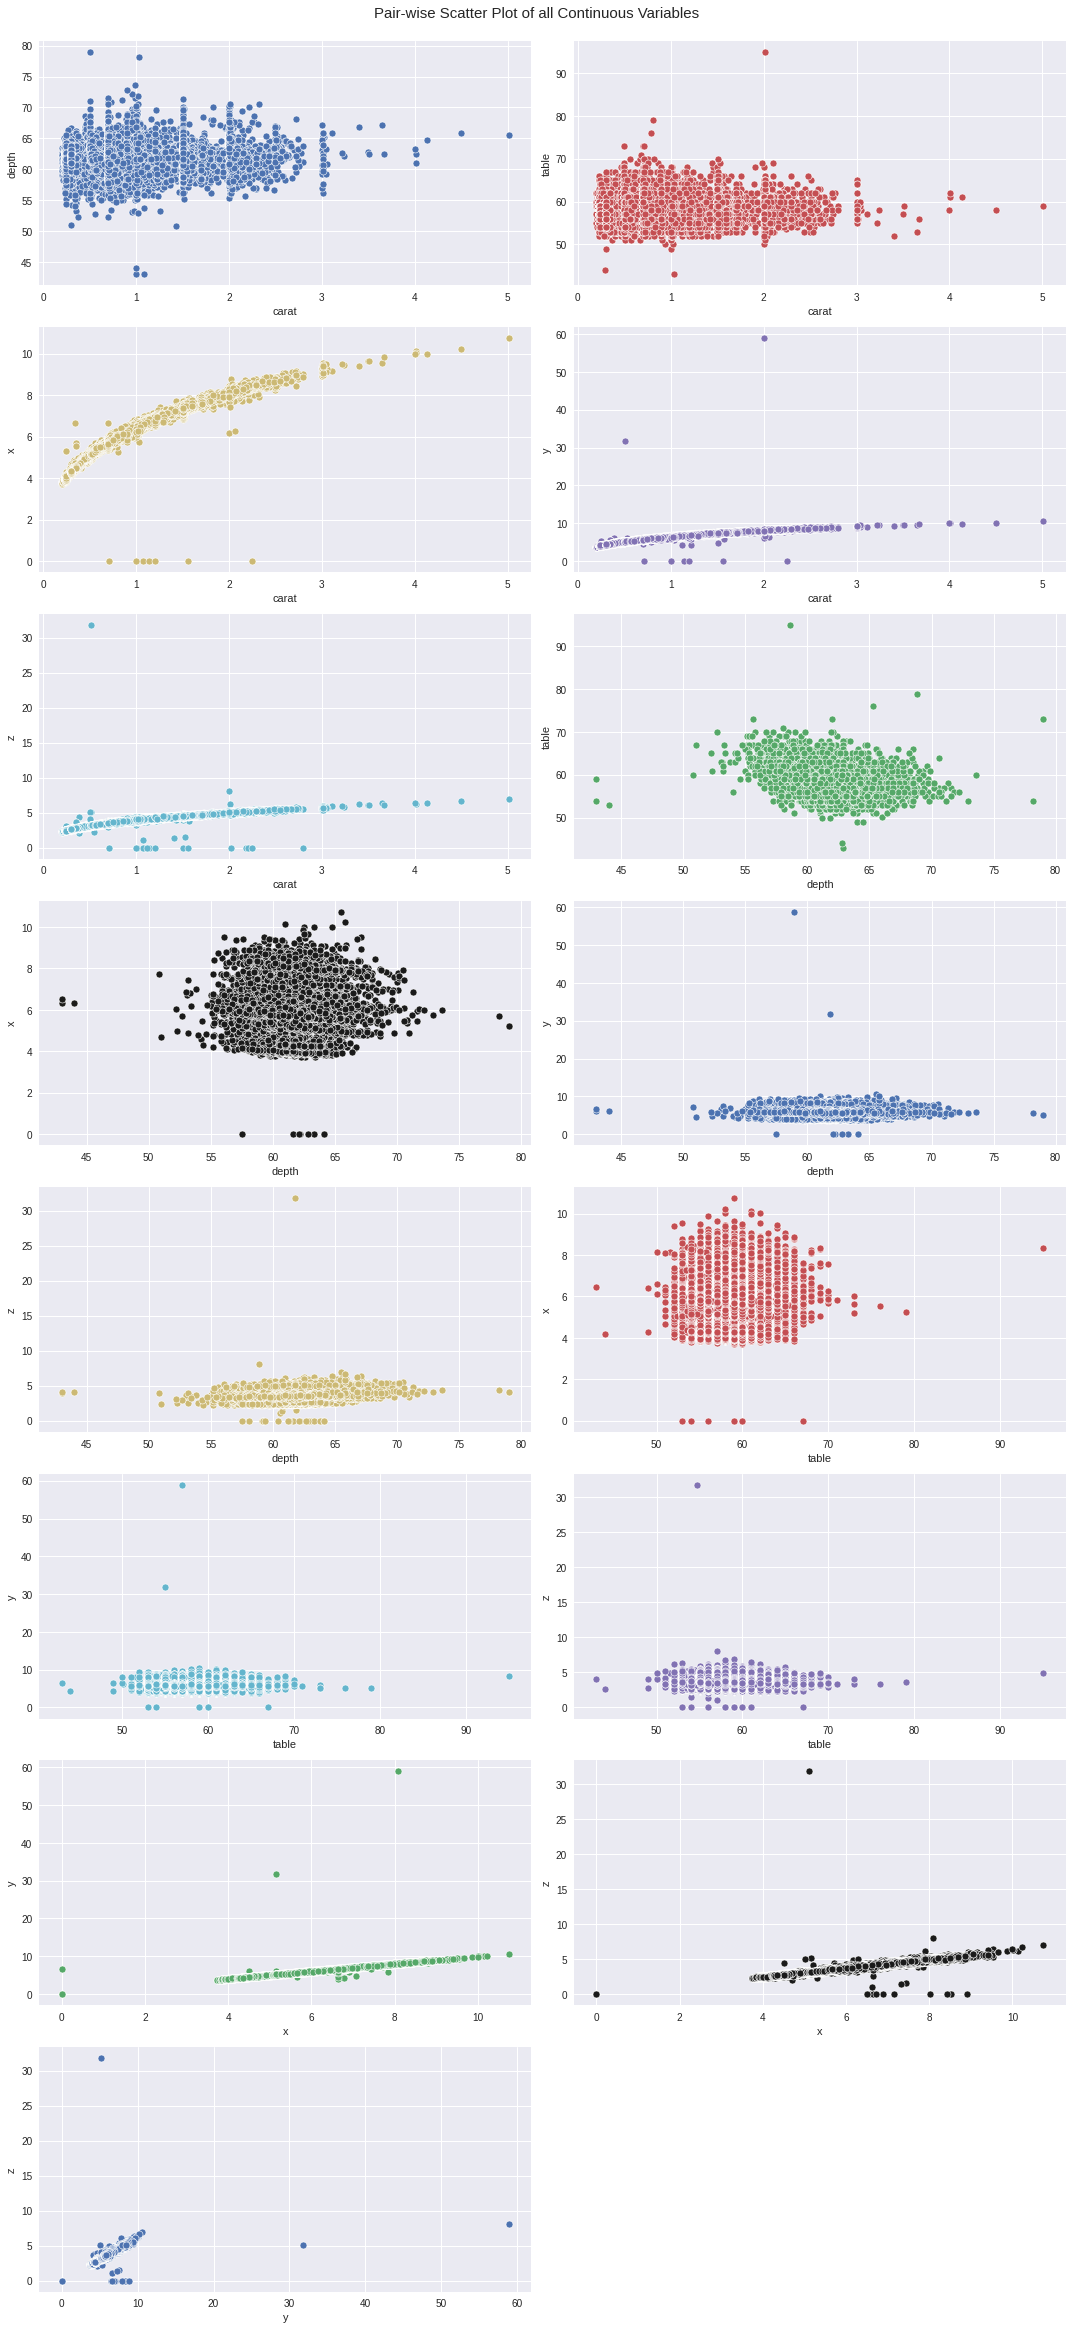

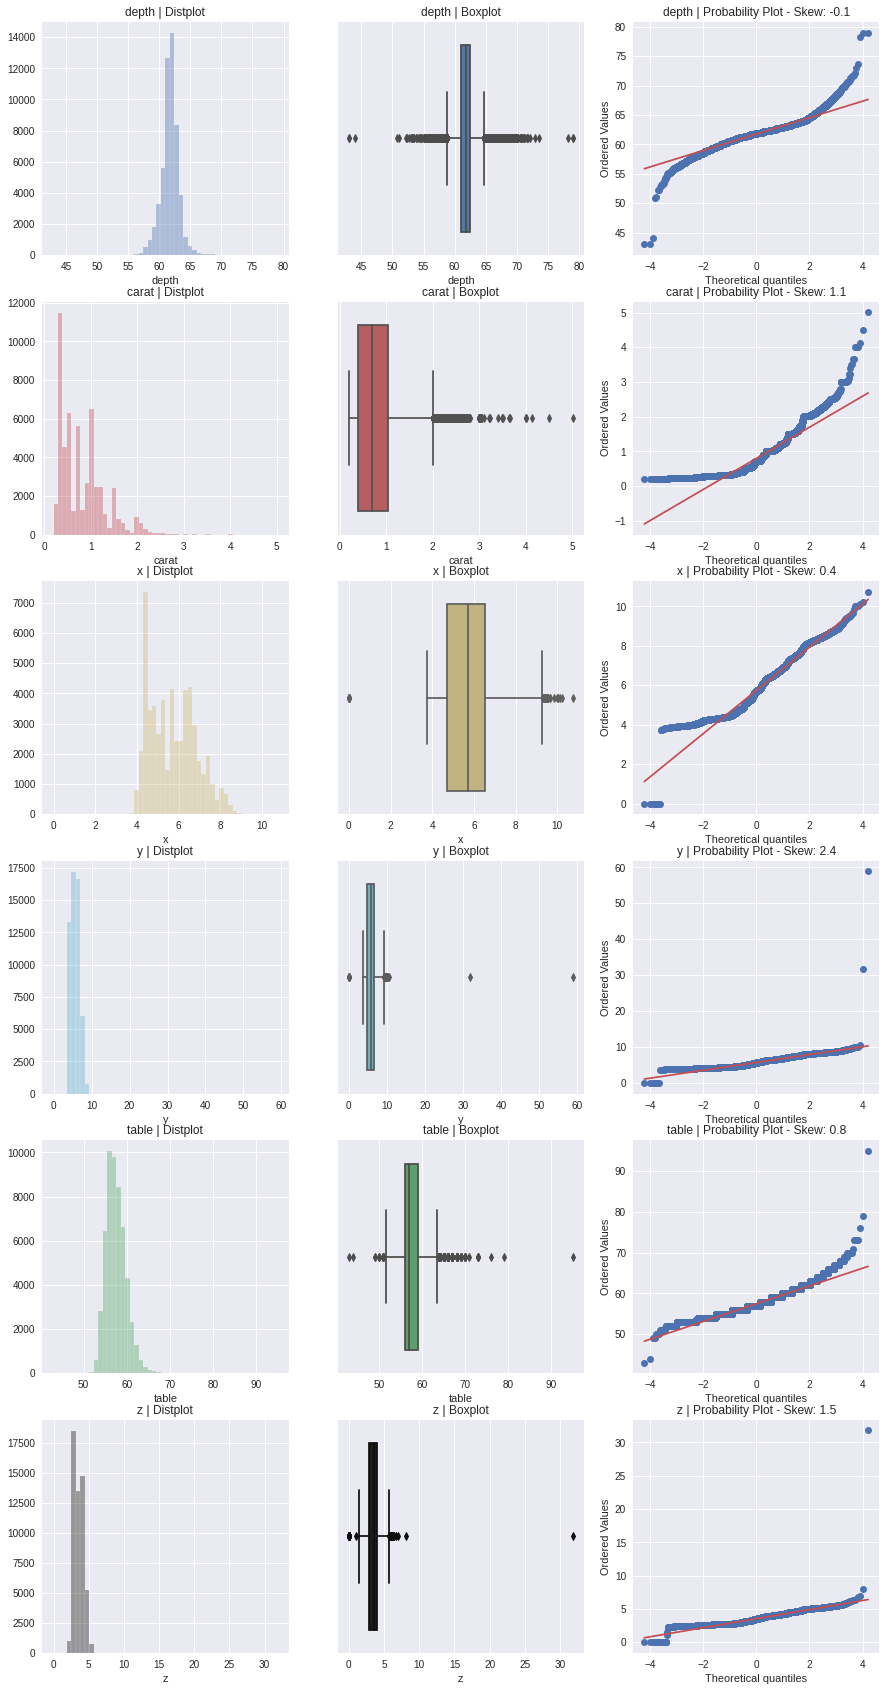

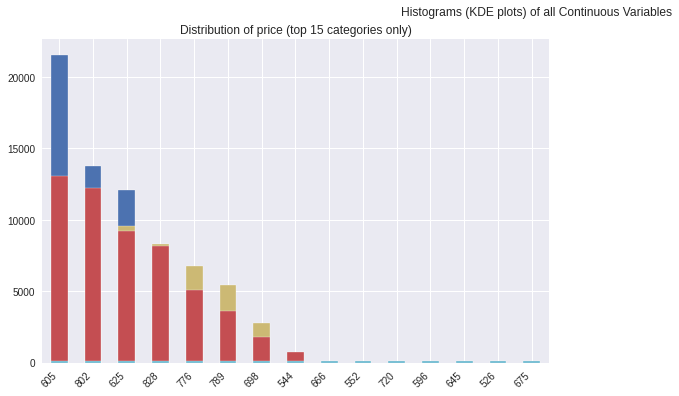

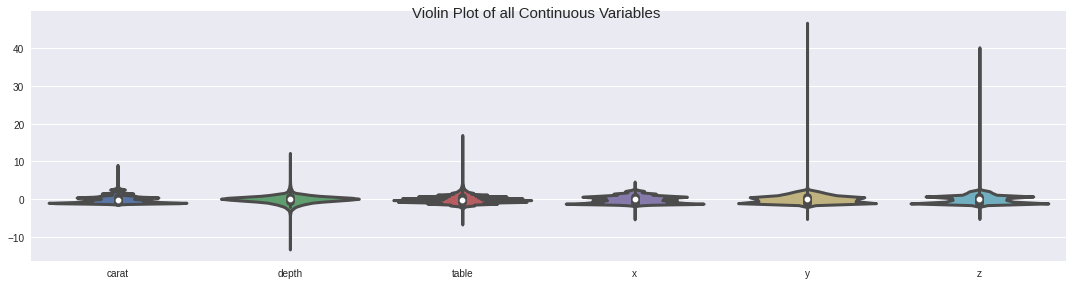

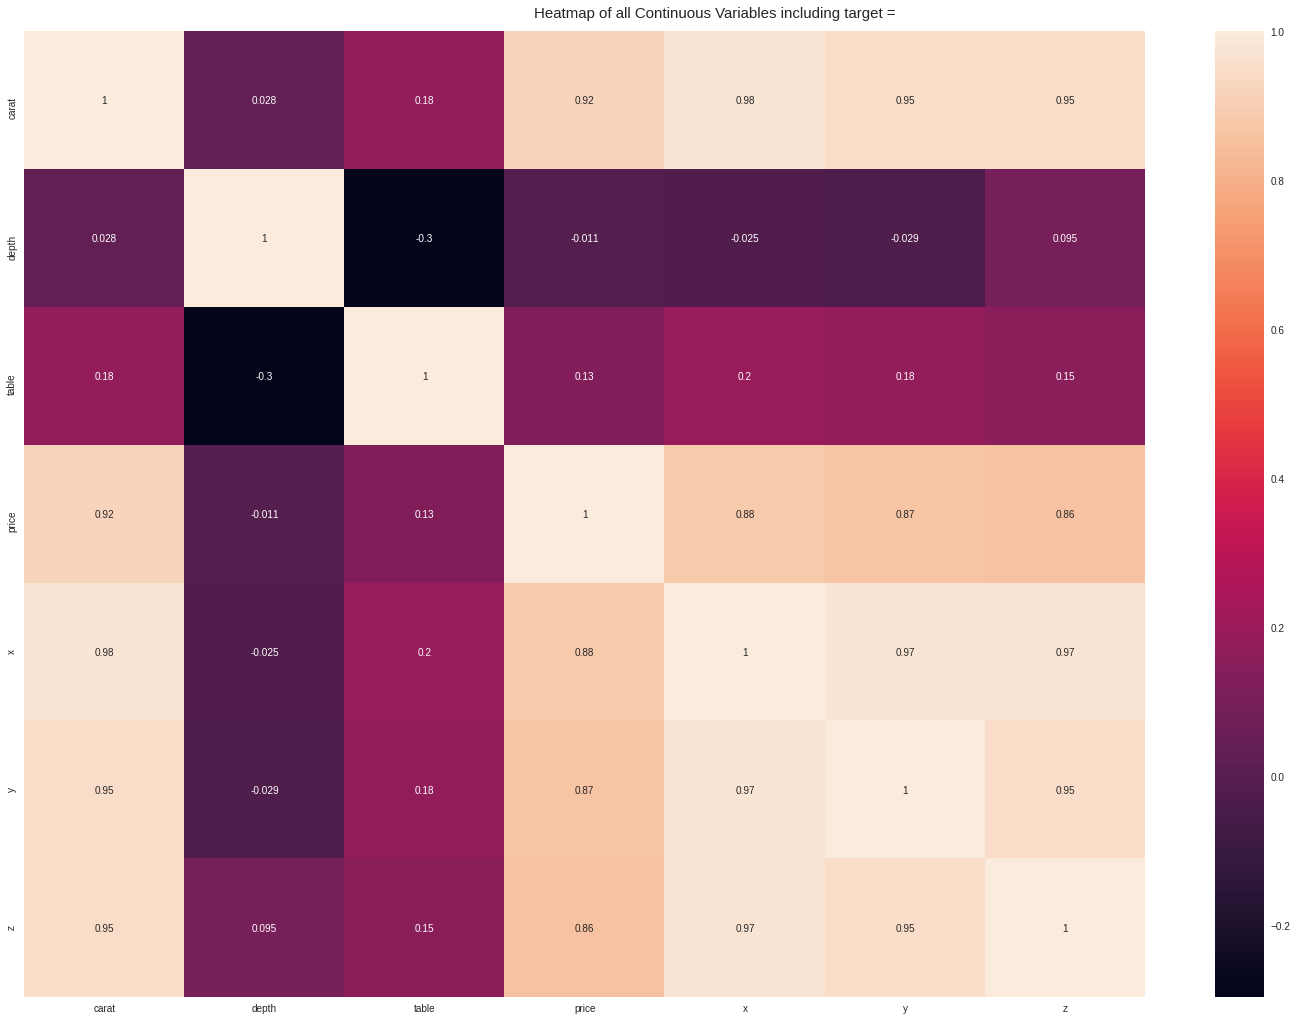

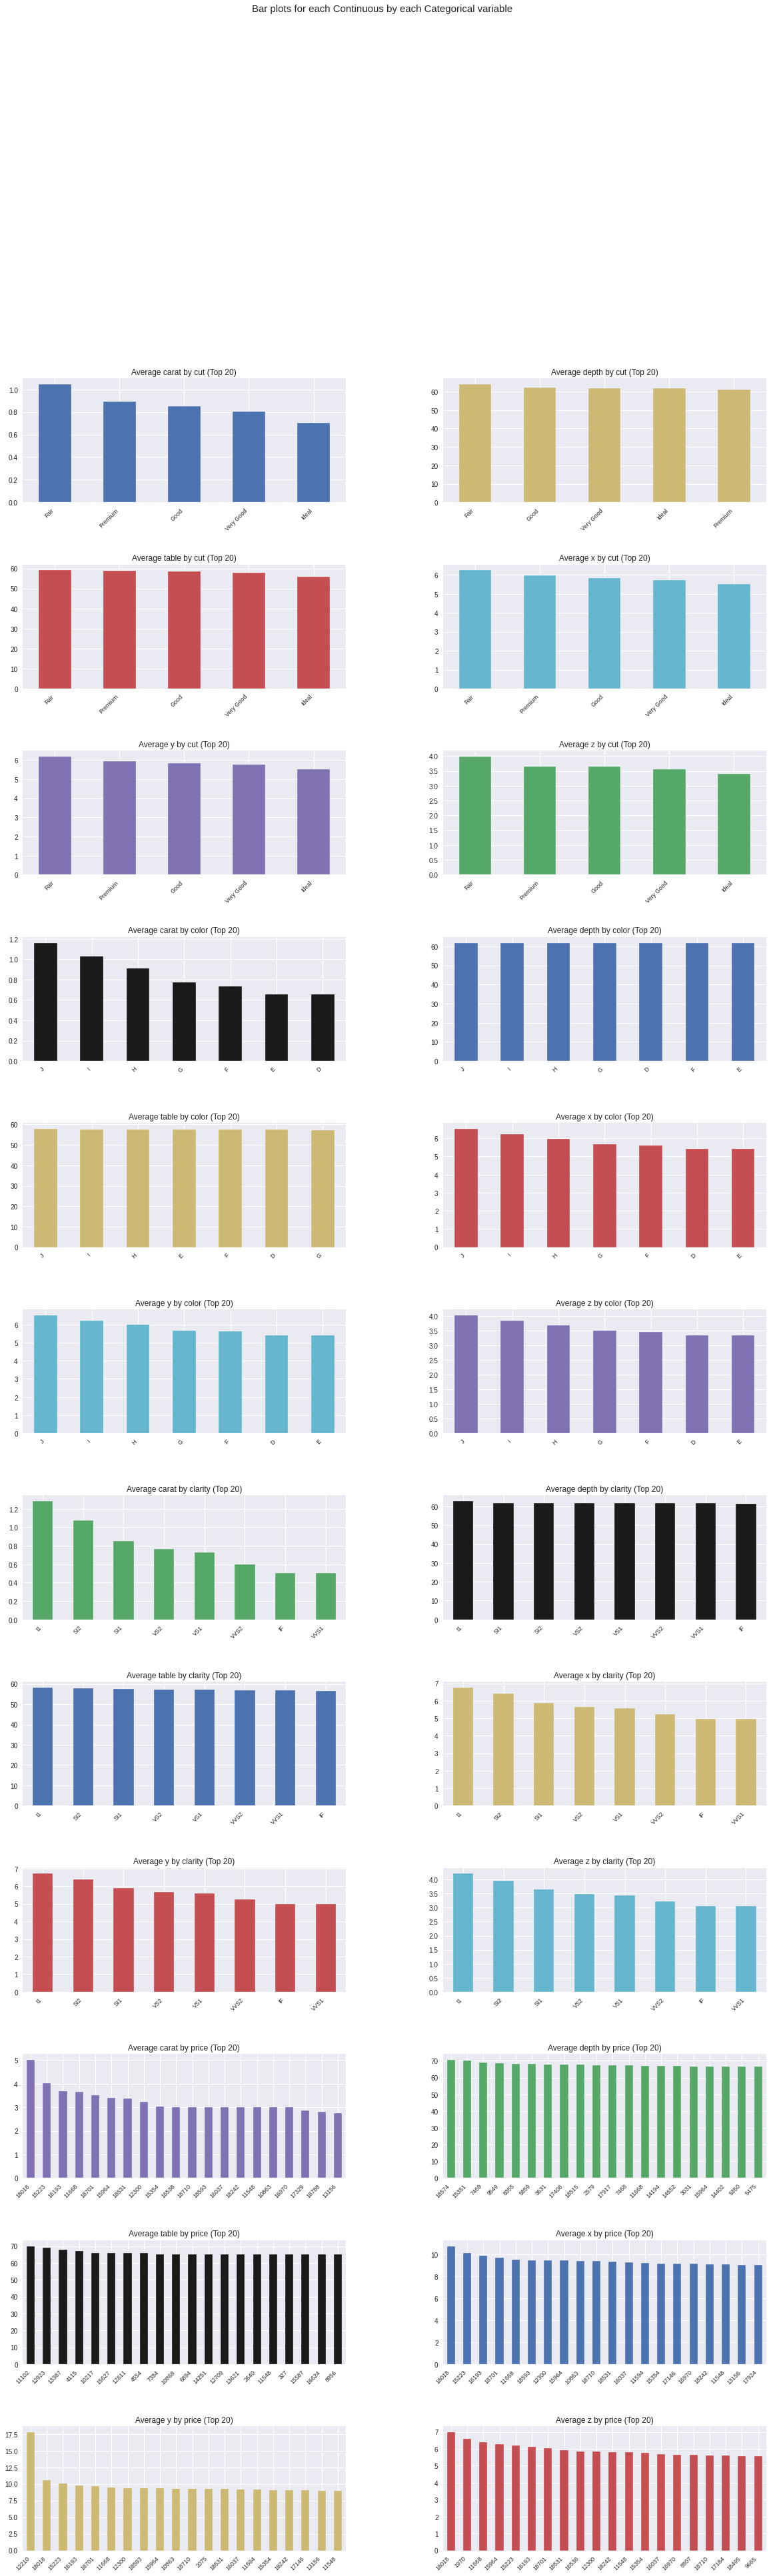

Time to run AutoViz (in seconds) = 22.172

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = "diamonds.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

The visulization can be used for more insights.

**Feature Selection**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

Therefore, all features are important. It's better no seed should be dropped. Standard value of alpha is  0.005. For better accuracy these can be checked with multiple alpha values

## **Training Models**

In [ ]:
from sklearn.metrics import r2_score

**Multiple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: -0.4548019525170026


**SVM**

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.5104045087372525


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(x_train, y_train)
tree_pred = tree_regressor.predict(x_test)
print("R2 Score:",r2_score(y_test, tree_pred))

R2 Score: 0.9632743129418756


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.978707951685774


**XGBoost**

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("R2 Score:",r2_score(y_test, y_pred))

[19:10:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score: 0.9664737987846235


From the  above algorithms we can see that decision tree, random forest and xgboost is working very good on the dataset. But I am picking here decision tree as my final model as we know that rest of the two  are esemble and boosting techniques respectively which takes much more time.

**HyperParameter Tuning**

It's not needed as already the accuracy more than 95%

**Final Result**

In [ ]:
final = pd.concat([pd.DataFrame(y_test), pd.DataFrame(tree_pred)], axis=1)
final.columns = ['Expected_Value', 'Predicted_Value']
final.head(10)

,Expected_Value,Predicted_Value
0,564,547.0
1,5914,5986.0
2,2562,2787.0
3,537,537.0
4,5964,4939.0
5,984,984.0
6,5247,5267.0
7,611,683.0
8,9645,12044.0
9,1162,971.0


**Save the Model**

In [ ]:
import pickle
pickle.dump(tree_regressor, open('complex_model', 'wb'))

# **Special Scenario: When very minimum information about a Diamond is known**

# **Load Dataset**

In [ ]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## **EDA**

**Correlation**

In [ ]:
df.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


From the above matrix we can see that carat is highly correlated with diamond price. Beside that carat is also  highly correlated with x, y, z. Depth and table are very less correlated with price. therfore, I am taking carat as the only  independent variable.

**Extract Dependent and Independent Variable**

In [ ]:
x = df.loc[:, ['carat']].values
y = df.loc[:, 'price'].values

**Split Train and Test Data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## **Model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.8482566296393821


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
x_polytest = poly_reg.fit_transform(x_test)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_poly, y_train)
y_pred = regressor.predict(x_polytest)
print("R2 Score:",r2_score(y_test, y_pred))

R2 Score: 0.8510179719738369


Thr r2 score using a single feature also very high. So, when the user doesn't have much data. The polynomial regression model can also be used.

**Final Result**

In [ ]:
final = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred)], axis=1)
final.columns = ['Expected_Value', 'Predicted_Value']
final.head(10)

,Expected_Value,Predicted_Value
0,564,421.548049
1,5914,6927.460461
2,2562,2513.266021
3,537,492.395788
4,5964,6927.460461
5,984,1855.880592
6,5247,5988.935355
7,611,990.890893
8,9645,9331.394253
9,1162,563.334988


**Save the Model**

In [ ]:
import pickle
pickle.dump(tree_regressor, open('simple_model', 'wb'))

# **Conclusion**

The complex model has higher efficiency  but it also need much more data to predict the value but the simple model doesn't need much more information to predict the value. It only needs carat. According to the performance simple model is also has good performance measure. So, if you have sufficient data to predict the price. Go for it and if you have very less amount data, like only carat then go for the simple one.